In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time
from datetime import datetime, timedelta

In [217]:
def light_curve(low_path: str, high_path: str, unique_ids: list = None):

    low_df = pd.read_csv(low_path)
    high_df = pd.read_csv(high_path)
    if unique_ids == None:
        unique_ids = high_df['Source ID'].tolist()
    for source in unique_ids:
        plt.subplots()
        source_df = low_df[low_df['Source ID'] == source]
        fluxes = source_df['Flux Density']
        fluxes = [float(flux.replace('mJy', '')) for flux in fluxes]
        flux_errs = source_df['Flux Uncert']
        flux_errs = [float(err.replace('mJy', '')) for err in flux_errs]
        date_times = source_df['Obs Date Time'].tolist()
        for i in range(len(date_times)):
            dt = date_times[i]
            m_end = dt.rindex(':')
            s_start = m_end + 1
            if dt[s_start:] == '60':
                dt = dt[:s_start] + '0'
                fmt = '%m-%d-%y %H:%M'
                date_times[i] = (datetime.strptime(dt[:m_end], fmt) + timedelta(minutes=1)).strftime('%m-%d-%y %H:%M:%S')

        fmt_str = '%m-%d-%y %H:%M:%S'
        date_times = [Time(datetime.strptime(dt, fmt_str), format='datetime', scale='utc').mjd for dt in date_times]

        freqs = source_df['Freq'].tolist()
        other = []
        milli = []
        micro = []
        for i in range(len(freqs)):
            if freqs[i] == 'Not found':
                other.append(i)
                pass
            else:
                try:
                    freqs[i] = float(freqs[i].replace('GHz', ''))
                    if freqs[i] > 214 and freqs[i] < 273:
                        milli.append(i)
                    elif freqs[i] > 340 and freqs[i] < 355:
                        micro.append(i)
                    else:
                        other.append(i)
                except Exception as e:
                    print(f'Error while getting the frequencies for source {source}: {e}')
        other_dt = [date_times[a] for a in other]
        other_flx = [fluxes[a] for a in other]
        other_flx_err = [flux_errs[a] for a in other]
        milli_dt = [date_times[b] for b in milli]
        milli_flx = [fluxes[b] for b in milli]
        milli_flx_err = [flux_errs[b] for b in milli]
        micro_dt = [date_times[c] for c in micro]
        micro_flx = [fluxes[c] for c in micro]
        micro_flx_err = [flux_errs[c] for c in micro]
        if other != []:
            plt.errorbar(other_dt, other_flx, yerr=other_flx_err, color='b', fmt='x', capsize=5, markersize=4,\
                        capthick=0.5, elinewidth=0.5)
        if milli != []:
            plt.errorbar(milli_dt, milli_flx, yerr=milli_flx_err, color='r', fmt='x', capsize=5, markersize=4,\
                        capthick=0.5, elinewidth=0.5)
        if micro != []:
            plt.errorbar(micro_dt, micro_flx, yerr=micro_flx_err, color='g', fmt='x', capsize=5, markersize=4,\
                        capthick=0.5, elinewidth=0.5)


/var/folders/3j/z5bj43t10vsdnks2s1xw3vm80000gn/T/ipykernel_5529/1522097428.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots()


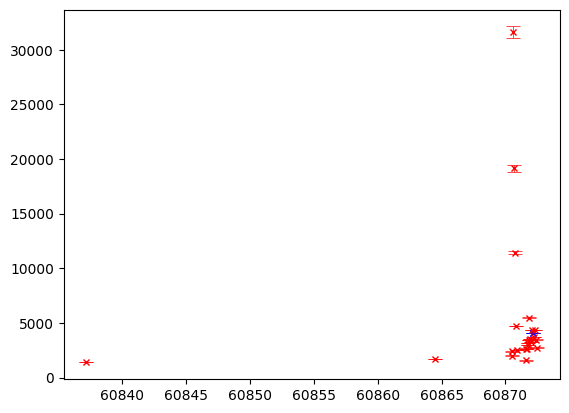

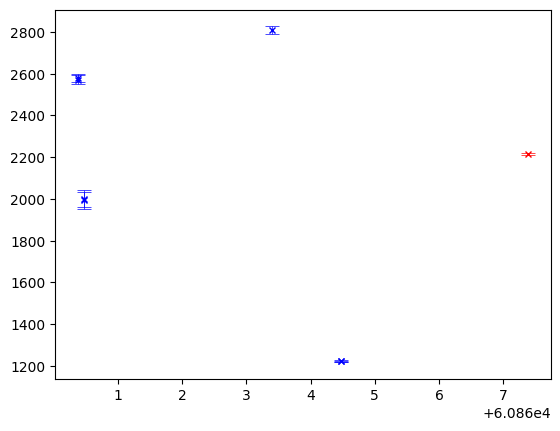

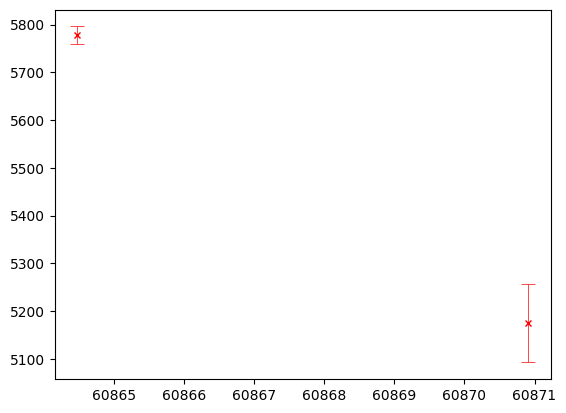

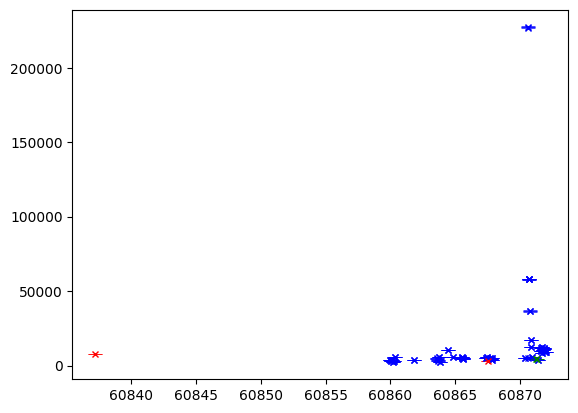

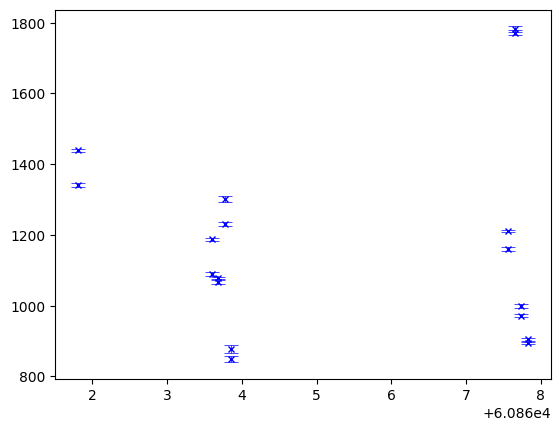

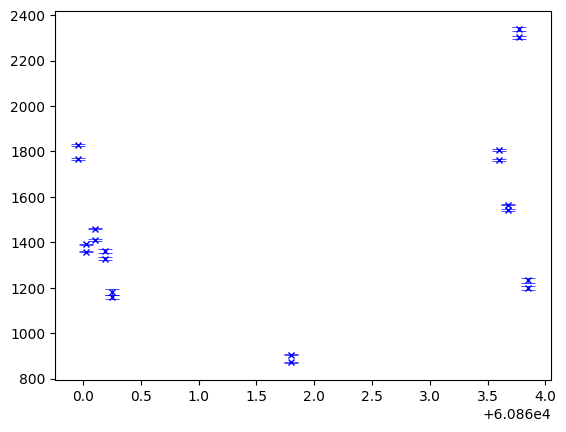

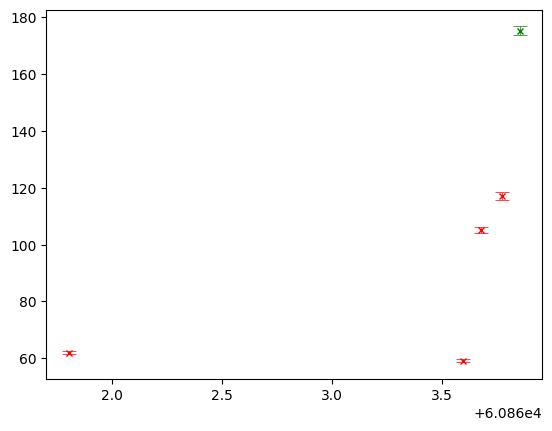

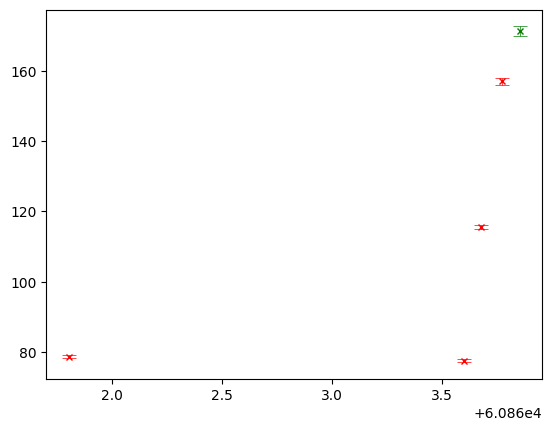

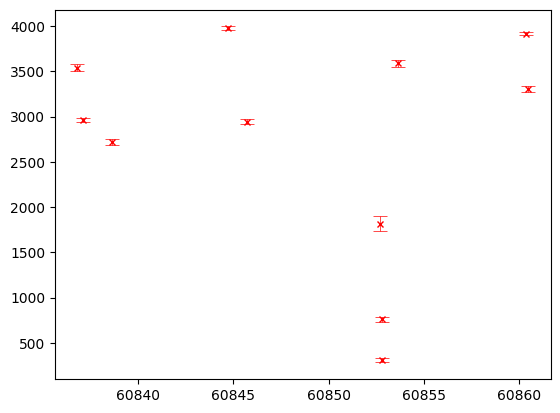

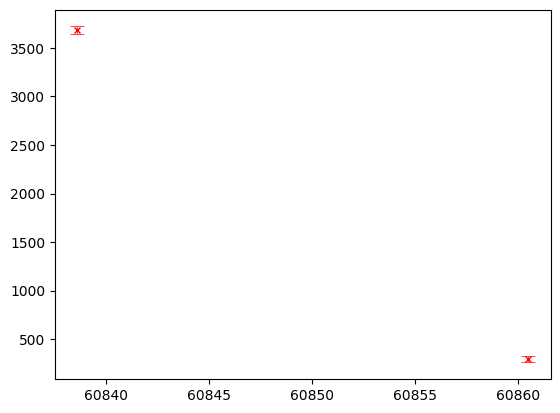

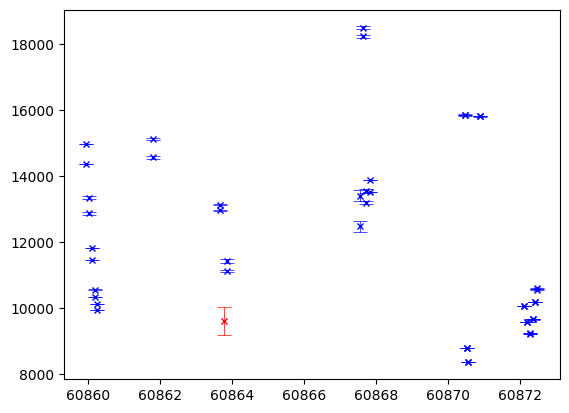

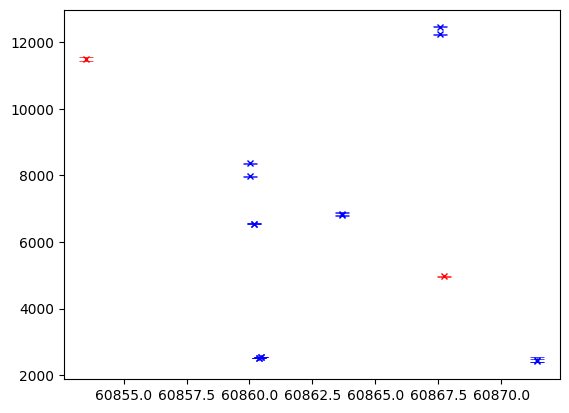

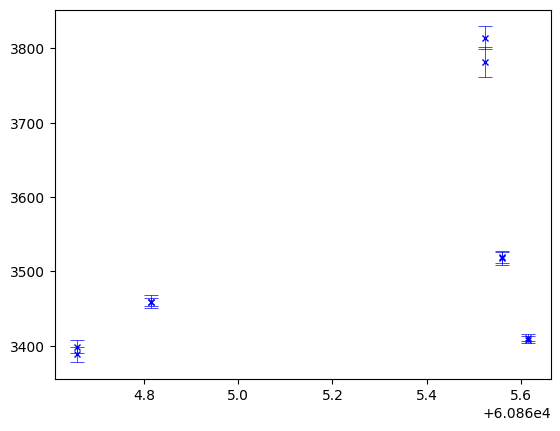

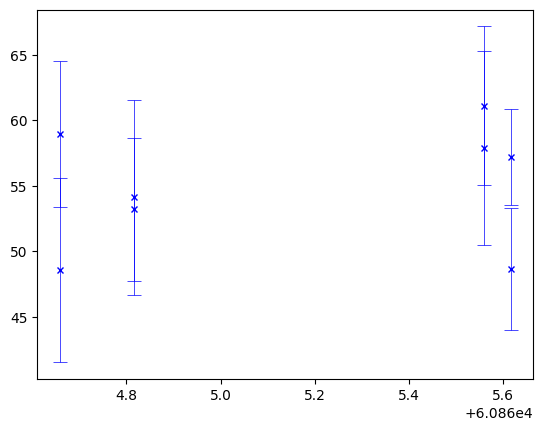

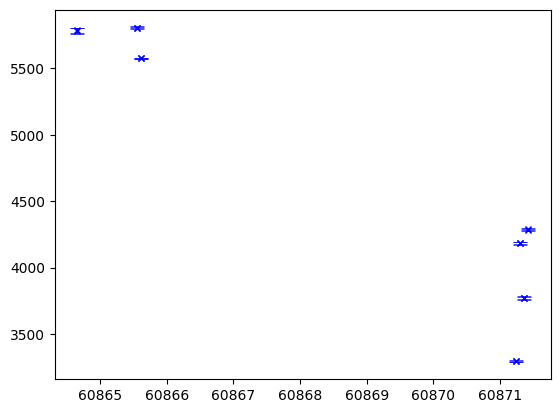

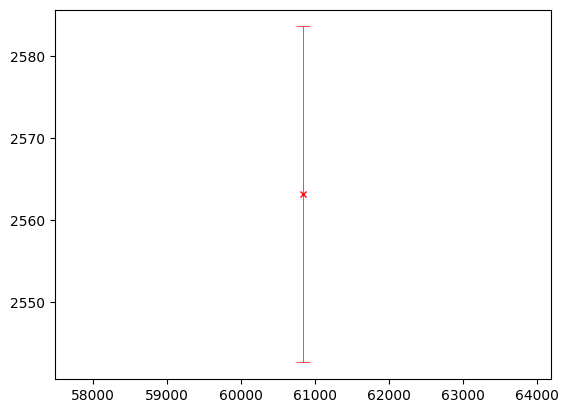

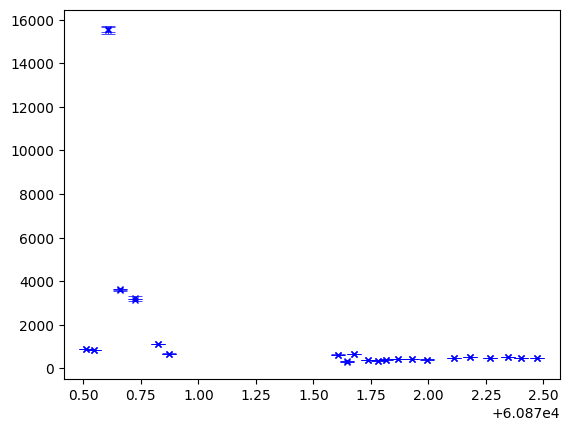

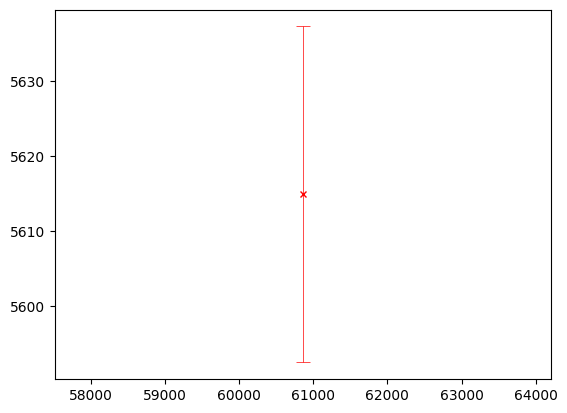

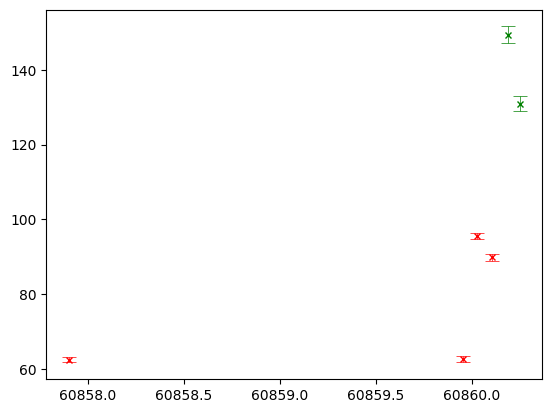

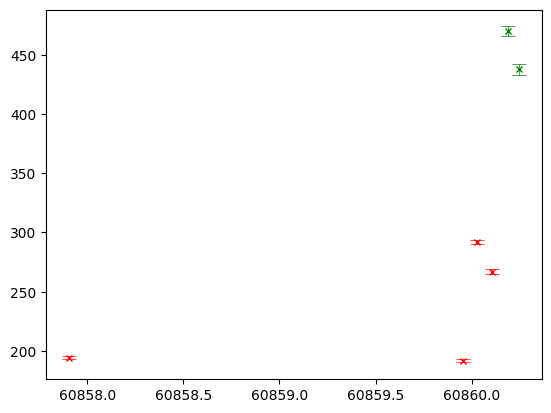

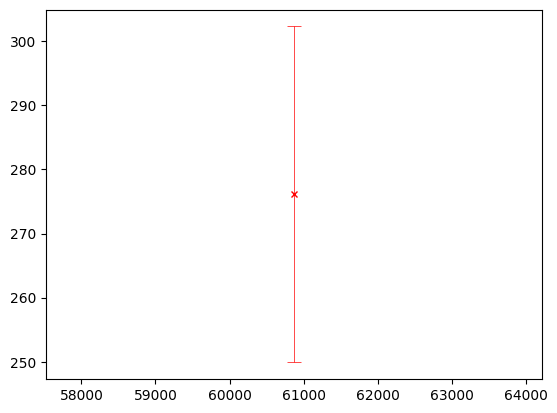

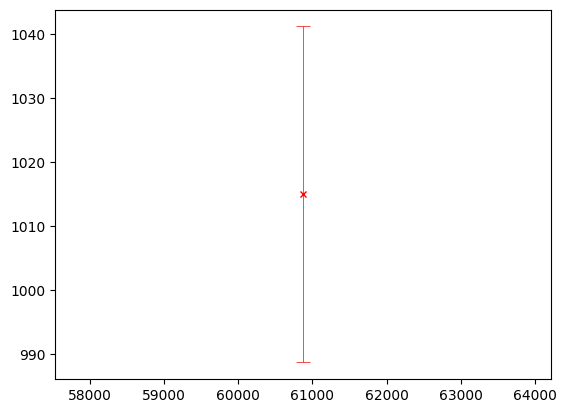

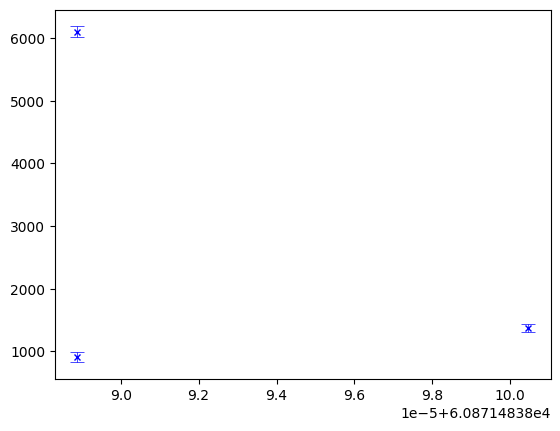

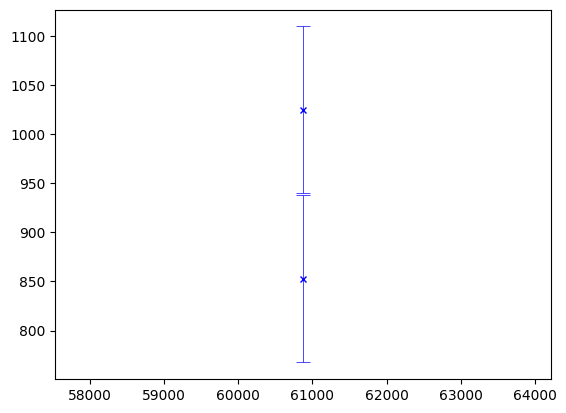

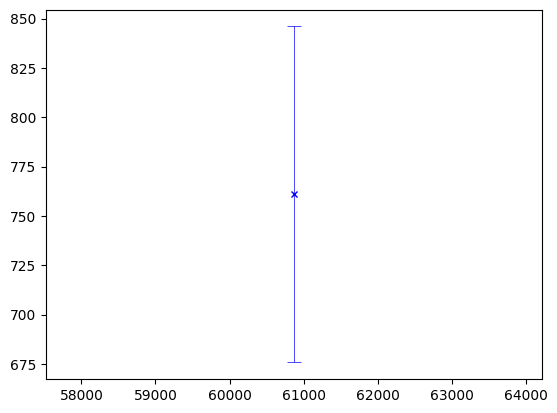

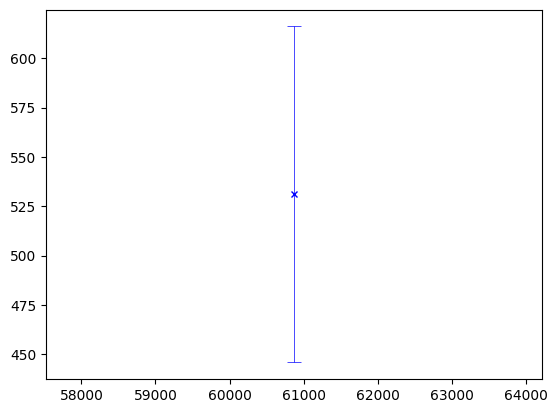

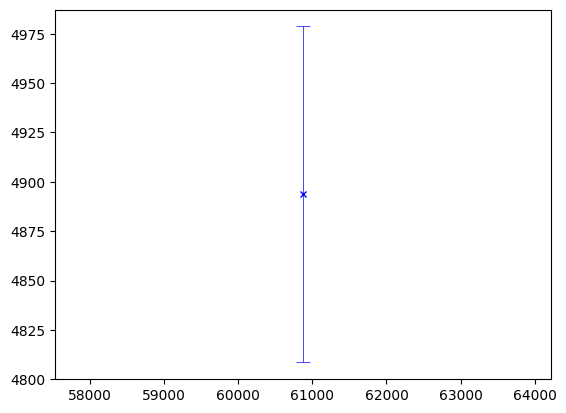

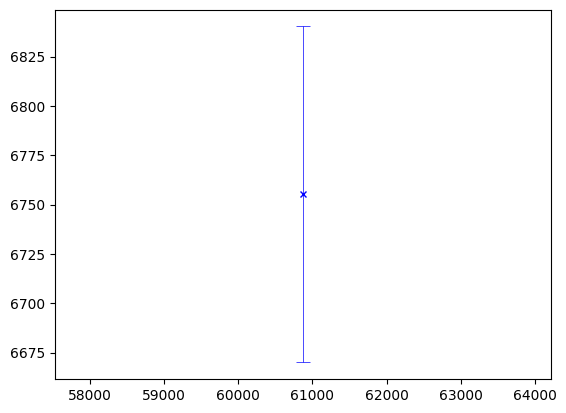

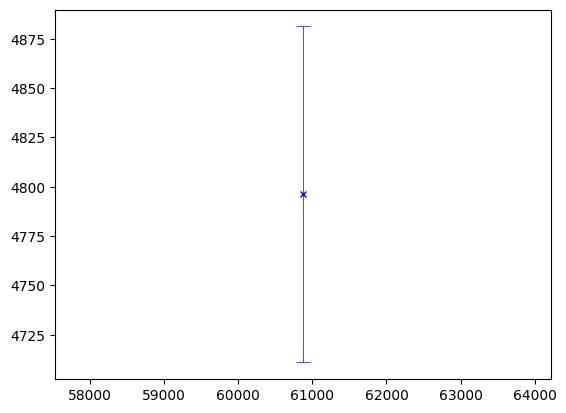

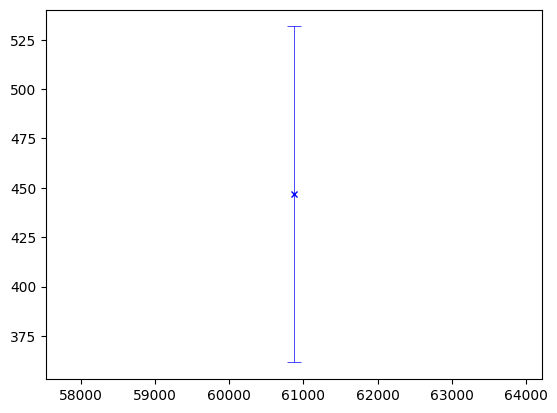

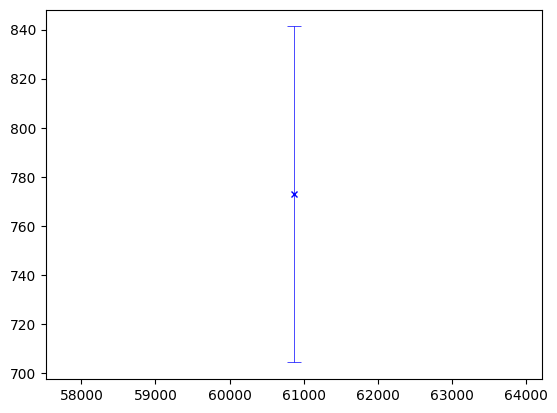

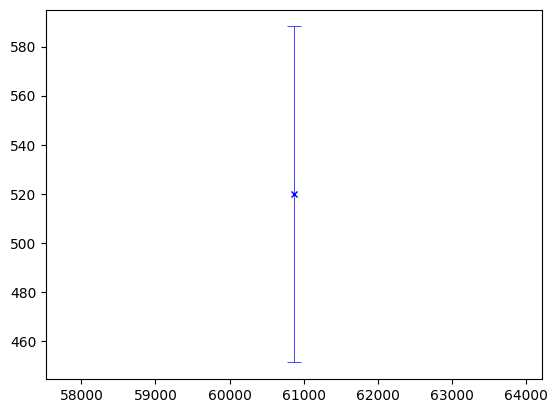

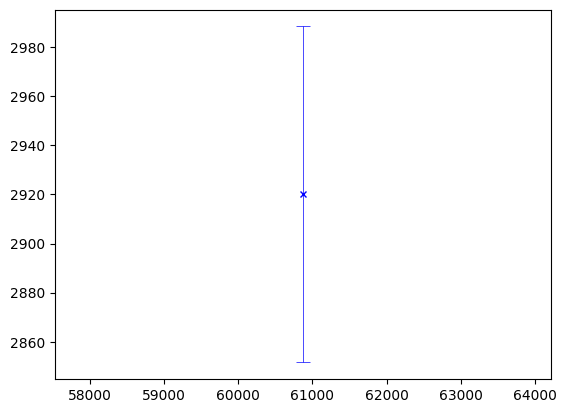

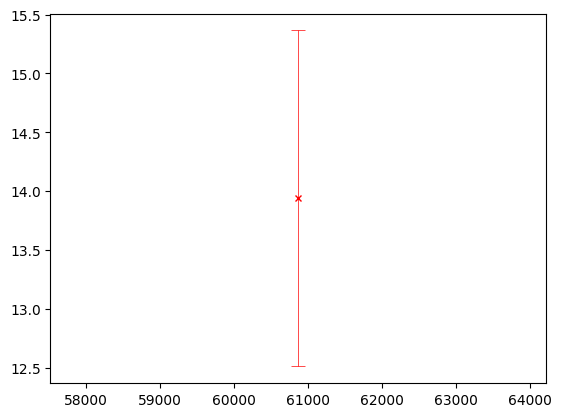

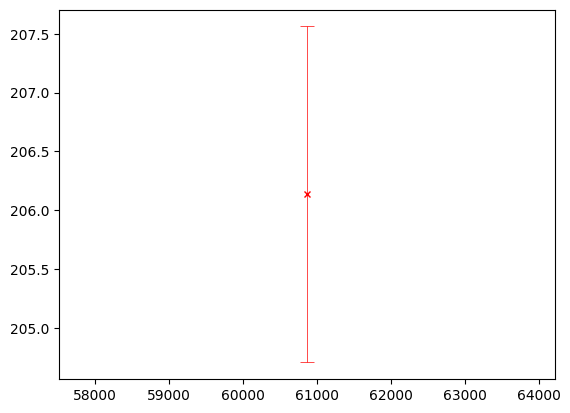

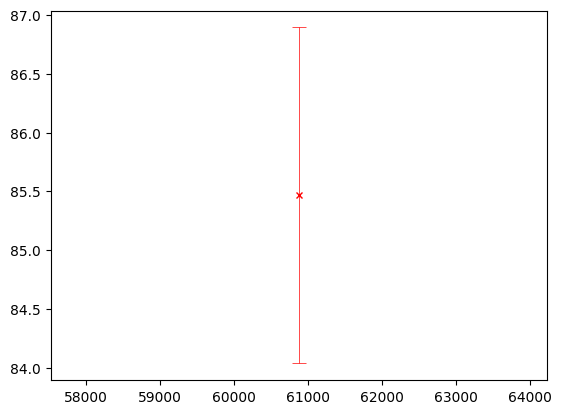

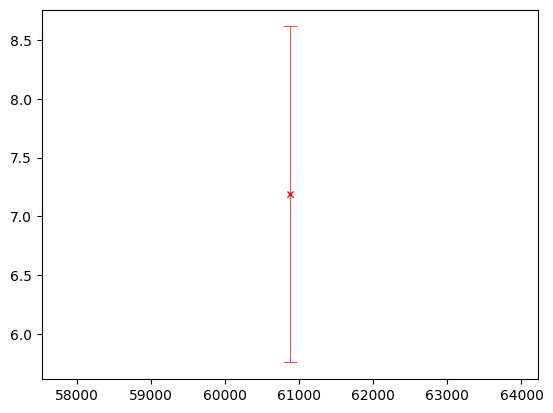

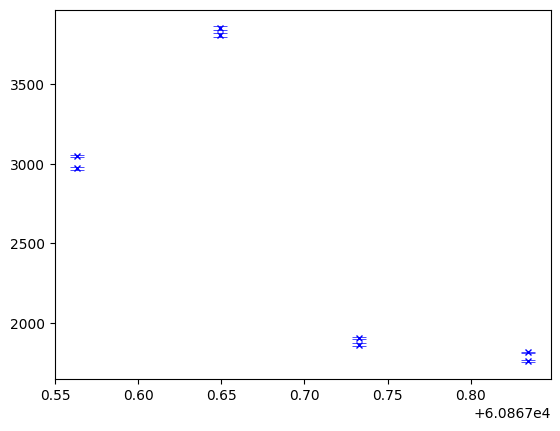

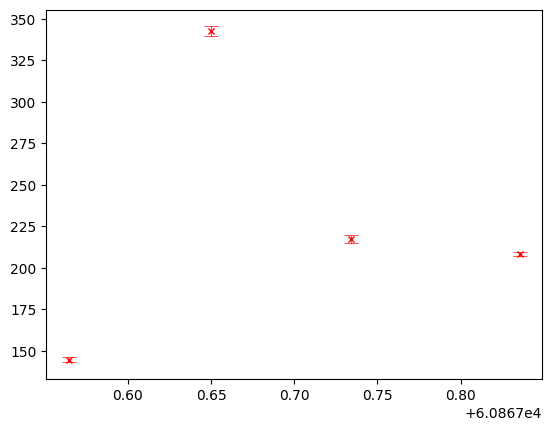

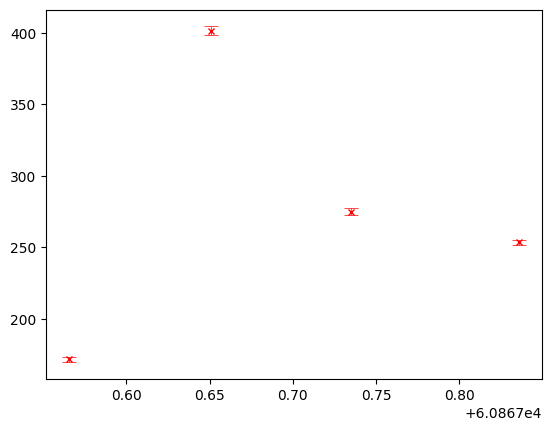

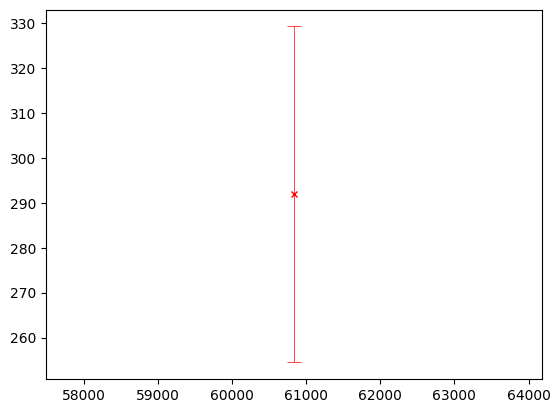

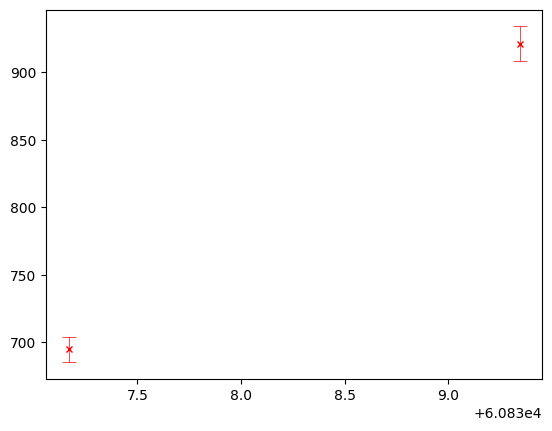

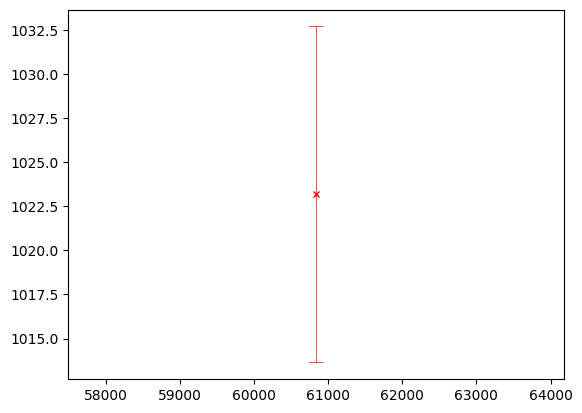

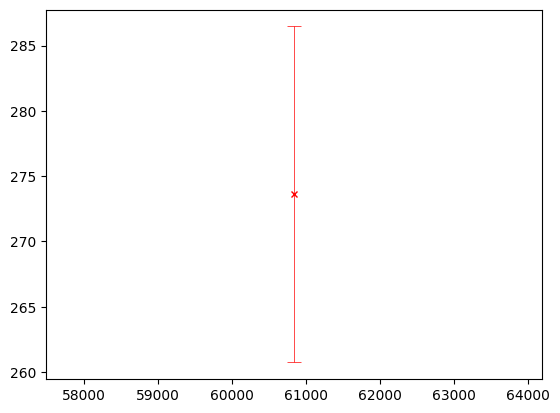

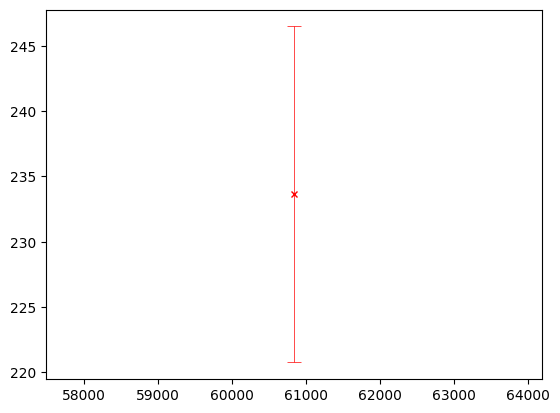

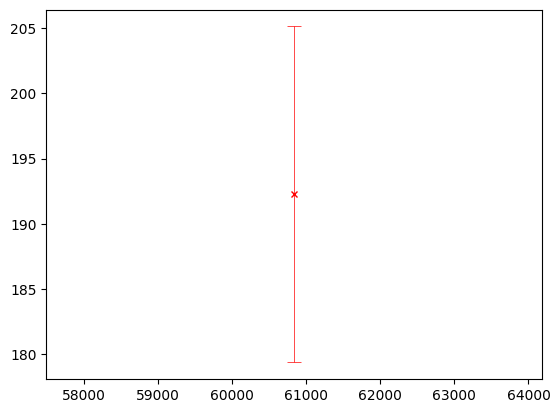

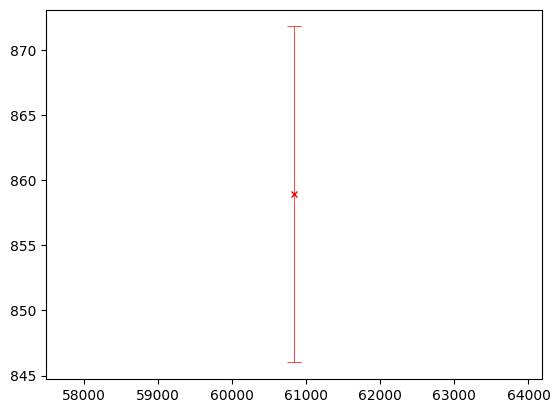

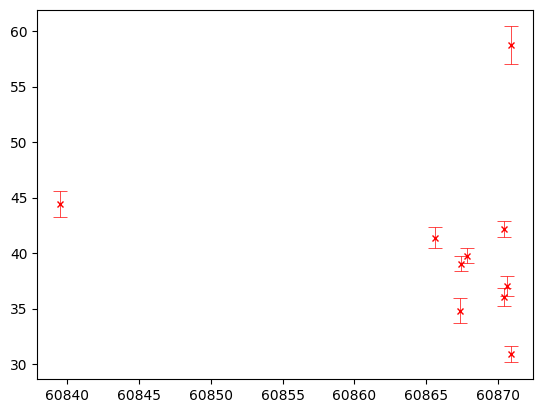

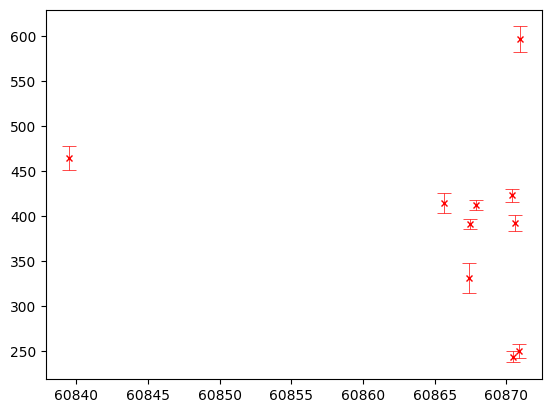

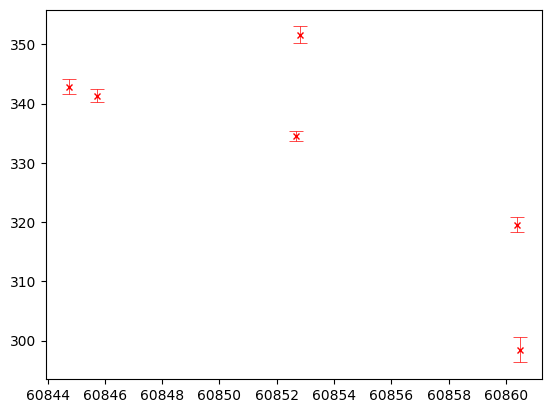

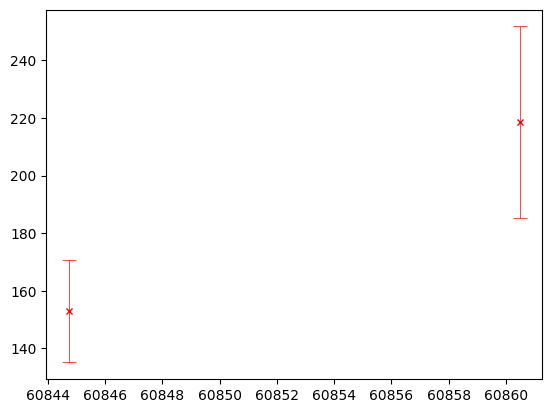

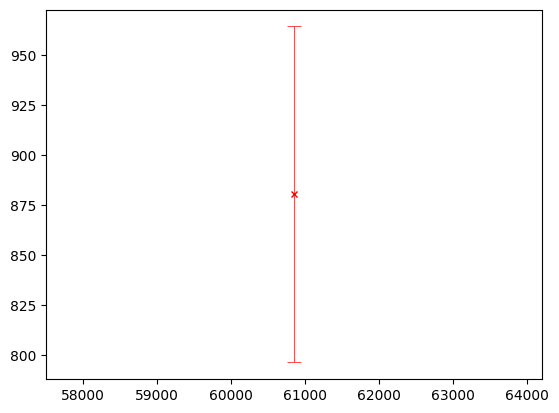

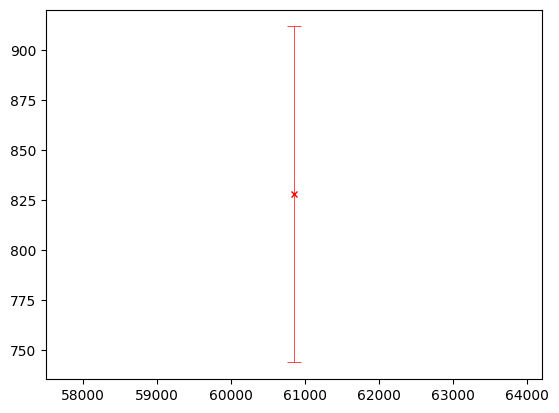

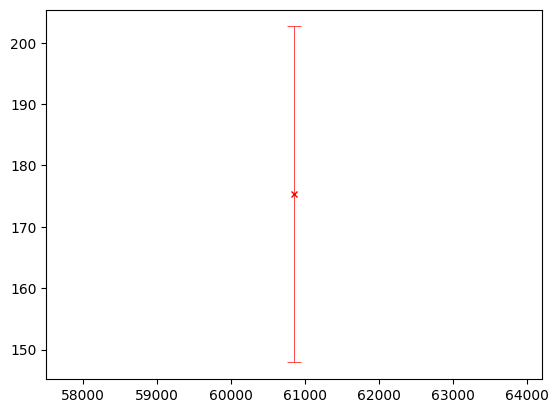

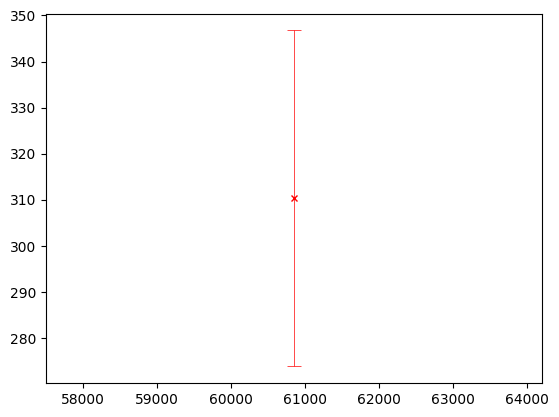

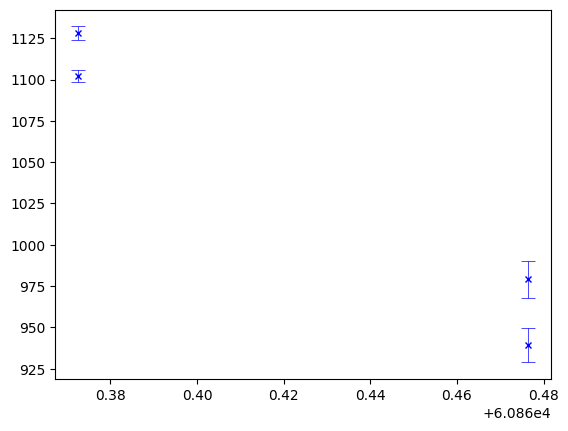

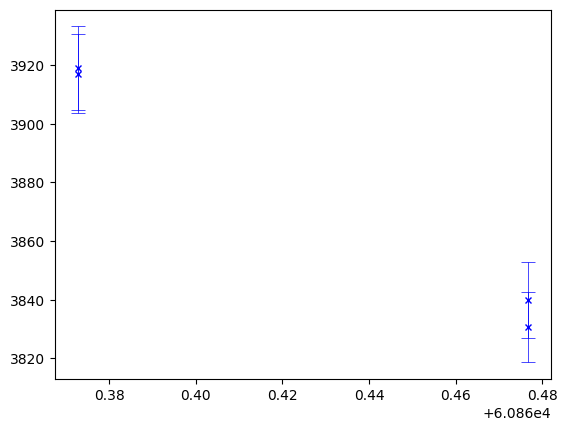

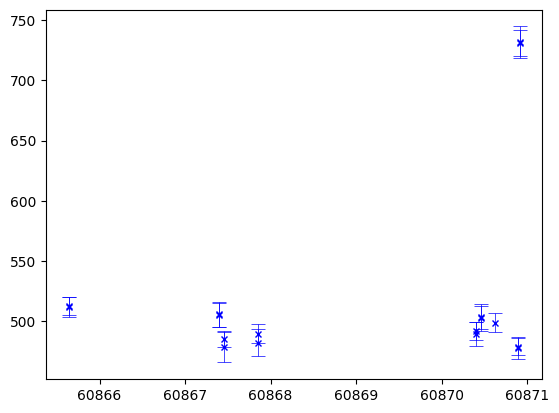

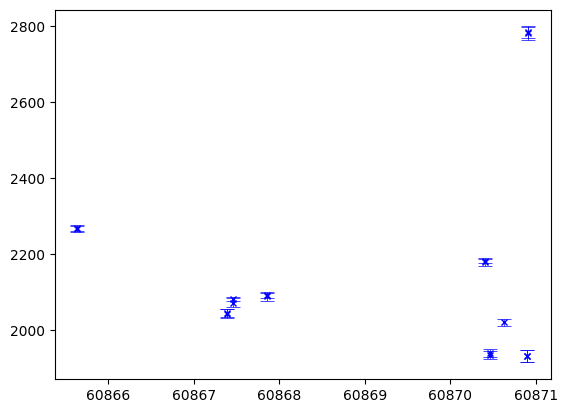

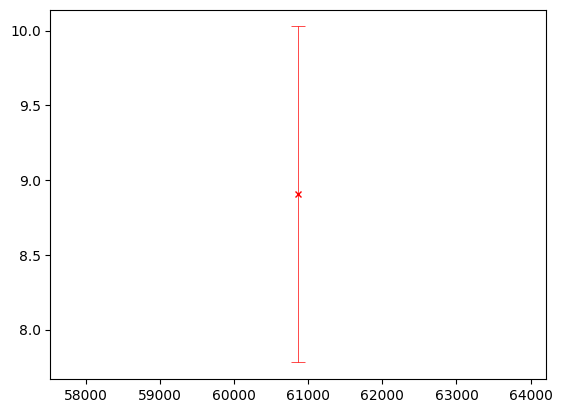

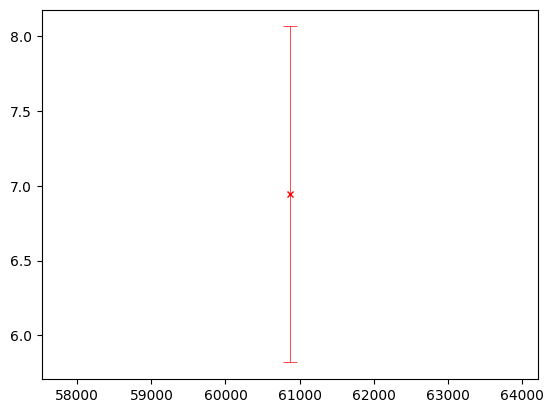

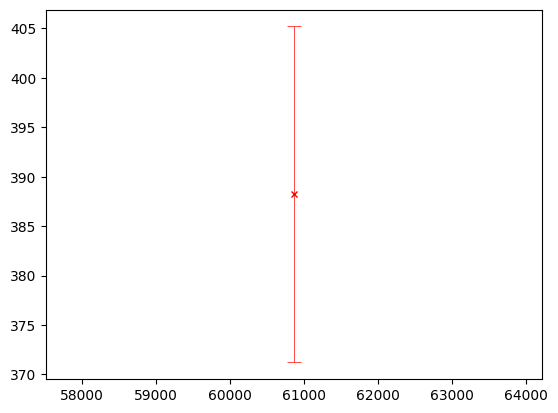

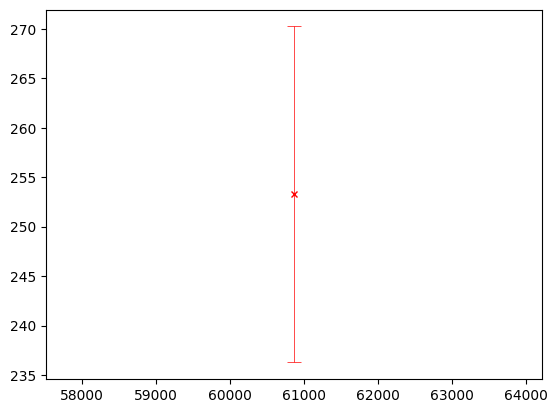

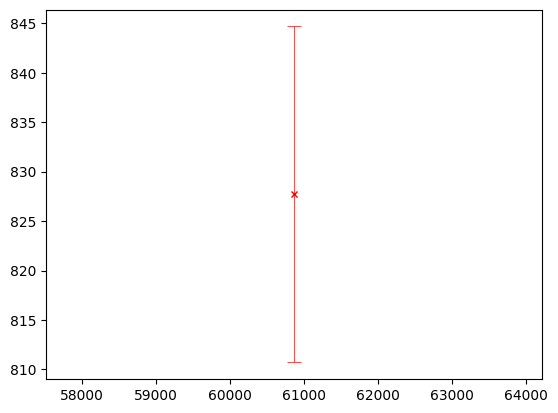

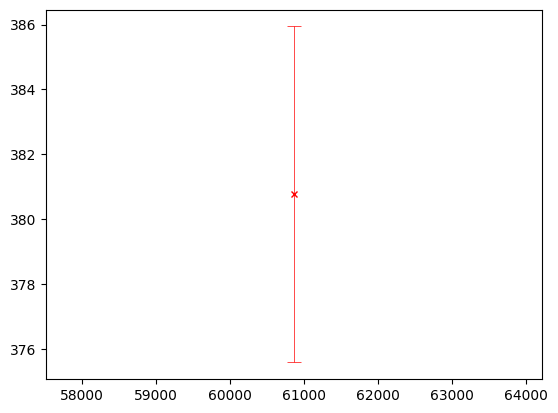

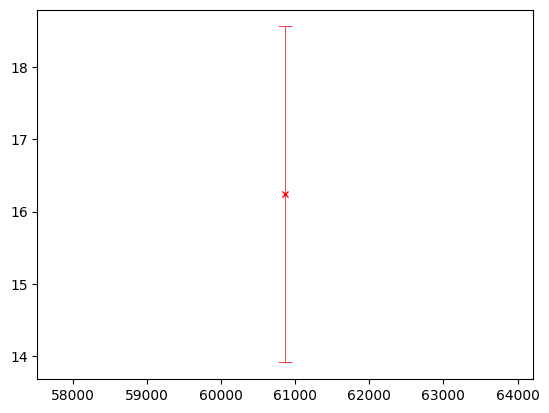

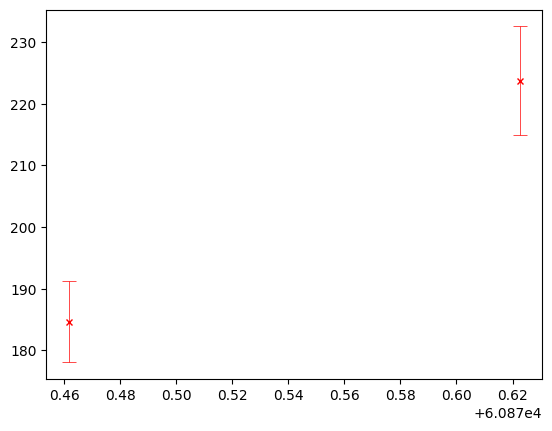

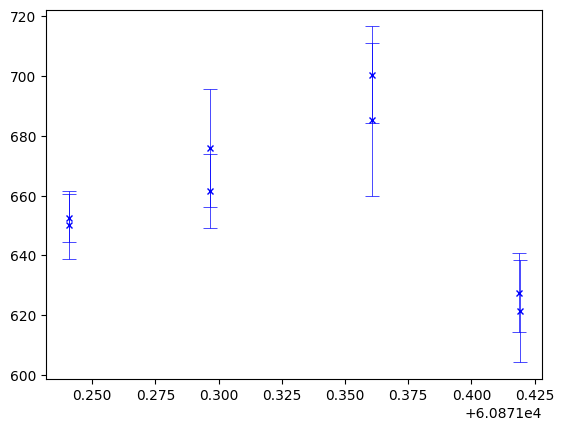

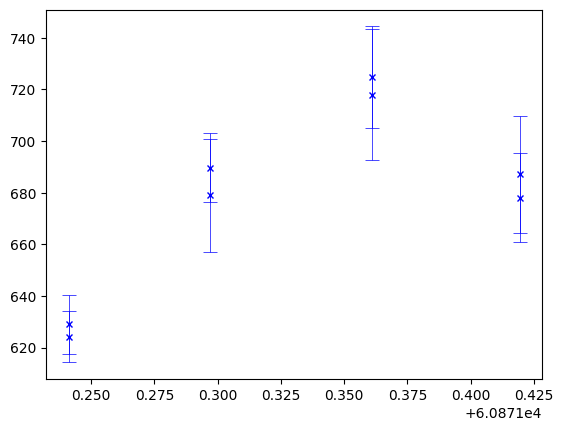

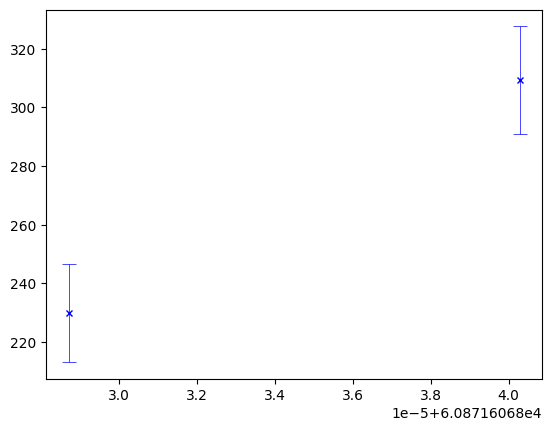

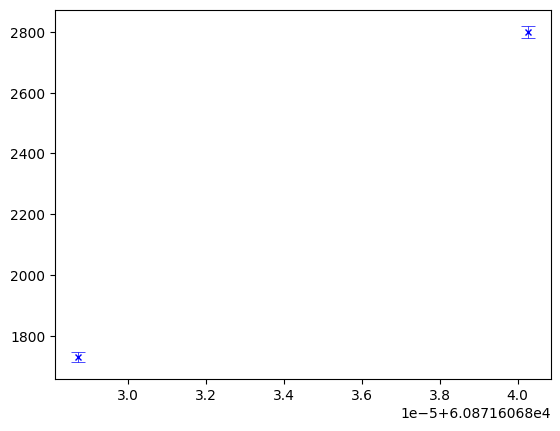

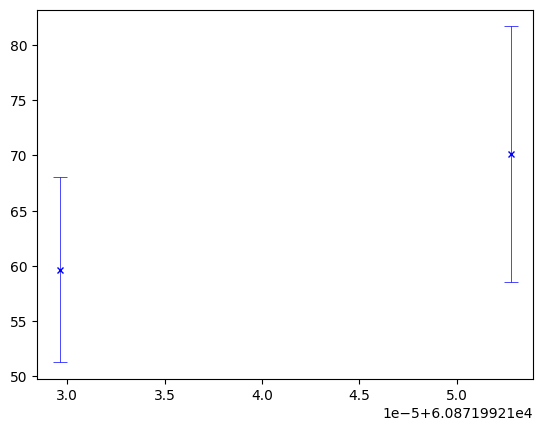

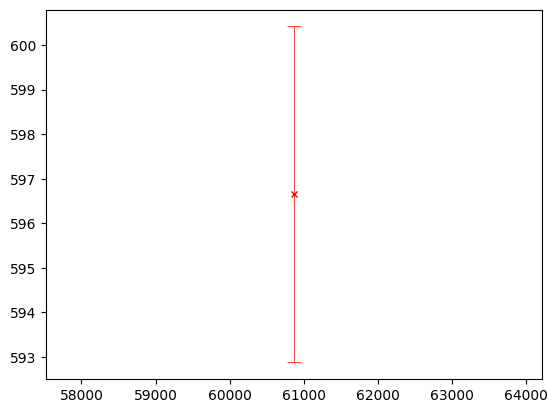

In [218]:
light_curve('./low_level.csv', './high_level.csv')